# Baseball

Analyzing of baseball dataset and predicting the winning possibility using the Linear Regession

baseball project process are as follows
1.importing packs
2.importing data
3.data analysis
4.EDA Process
5.modeling
6.prediction
7.cross validation
8.saving file

Importing packets 

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Importing dataset

In [156]:
df=pd.read_csv('baseball.csv')
data

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [157]:
df.columns # columns of datasets

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [195]:
# changing the column names into meaning full words
data=df.rename(columns={'W':'Win','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Tribles','HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs',
       'ERA':'Earned Run Average', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})
data

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [196]:
data.shape #getting the shape of dataset

(30, 17)

In [197]:
data.head()# first 5 rows of dataset

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [198]:
data.tail()#last 5 rows of dataset

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


 # Data Analysis and preprocessing

In [162]:
data.info() # finding the data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Win                 30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Tribles             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  CG                  30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [199]:
data.isnull().sum()# trying to find the null value of dataset

Win                   0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Tribles               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
CG                    0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

Zscore is used to check whether outliners are present in the dataset or not

In [164]:
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score).all(axis=1)]    
print(data_final.shape)   

(30, 17)
(30, 17)


Since there is no outliners in our dataset we are getting 30,17 as shape

In [165]:
#checking for skewness in the dataset
data_final.skew()
#there are skewness which need to be treated

Win                   0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Tribles               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
CG                    0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

In [166]:
#treating the skewness with log1p

for col in data_final.columns:
    if data_final.skew().loc[col]>0.55:
        data_final[col]=np.log1p(data_final[col])

In [167]:
#skewness after treating with log1p
data_final.skew()

Win                   0.047089
Runs                  0.744813
At Bats               0.183437
Hits                  0.628584
Doubles              -0.230650
Tribles               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
CG                   -0.325962
Shutouts             -0.589640
Saves                 0.163057
Errors                0.632916
dtype: float64

# Electronic design automation (EDA)

In [168]:
# to get descriptive statistics for all columns of dataset
data_final.describe()

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,6.532226,5516.266667,7.246673,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,1.287997,2.452144,3.770749,4.547594
std,10.453455,0.082466,70.467372,0.040214,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,0.690598,0.355610,0.175148,0.140415
min,63.000000,6.352629,5385.000000,7.189168,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,1.609438,3.367296,4.330733
25%,74.000000,6.480422,5464.000000,7.218177,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,0.693147,2.302585,3.644080,4.465908
50%,81.000000,6.536692,5510.000000,7.232372,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,1.386294,2.564949,3.760930,4.521729
75%,87.750000,6.578200,5570.000000,7.280962,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,1.907372,2.639057,3.865938,4.582403
max,100.000000,6.793466,5649.000000,7.323831,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,2.484907,3.091042,4.143135,4.844187


In [169]:
#Finding the co-relation with each-other

data_final.corr()

,Win,Runs,At Bats,Hits,Doubles,Tribles,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,CG,Shutouts,Saves,Errors
Win,1.000000,0.442808,-0.087947,0.035307,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.047176,0.436247,0.668097,-0.090225
Runs,0.442808,1.000000,0.338137,0.481814,0.566754,-0.045152,0.676421,0.395835,-0.030676,0.081068,-0.051780,-0.049372,-0.058923,0.257477,-0.122232,-0.075357,-0.015624
At Bats,-0.087947,0.338137,1.000000,0.740101,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.059218,-0.189223,-0.133599,0.322303
Hits,0.035307,0.481814,0.740101,1.000000,0.566231,0.476582,-0.091319,-0.117854,-0.400196,0.415694,0.223397,0.251906,0.230628,0.113814,-0.125939,-0.152503,-0.032360
Doubles,0.427797,0.566754,0.453370,0.566231,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.282895,0.073459,0.144282,0.109864
Tribles,-0.251118,-0.045152,0.435422,0.476582,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.058674,-0.064669,-0.184189,0.115377
Homeruns,0.307407,0.676421,-0.066983,-0.091319,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.200279,-0.068809,-0.005146,-0.198340
Walks,0.484342,0.395835,-0.136414,-0.117854,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.484686,0.362907,0.110550,-0.075701
Strikeouts,0.111850,-0.030676,-0.106022,-0.400196,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.104017,0.173573,0.155716,0.163744
Stolen Bases,-0.157234,0.081068,0.372618,0.415694,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.033010,-0.092023,-0.196962,0.074754


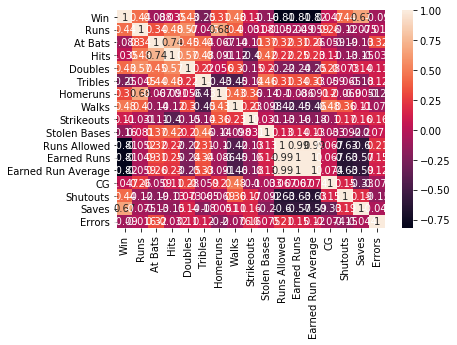

In [170]:
# Heatmap of co-related data

sb.heatmap(data_final.corr(),annot=True)

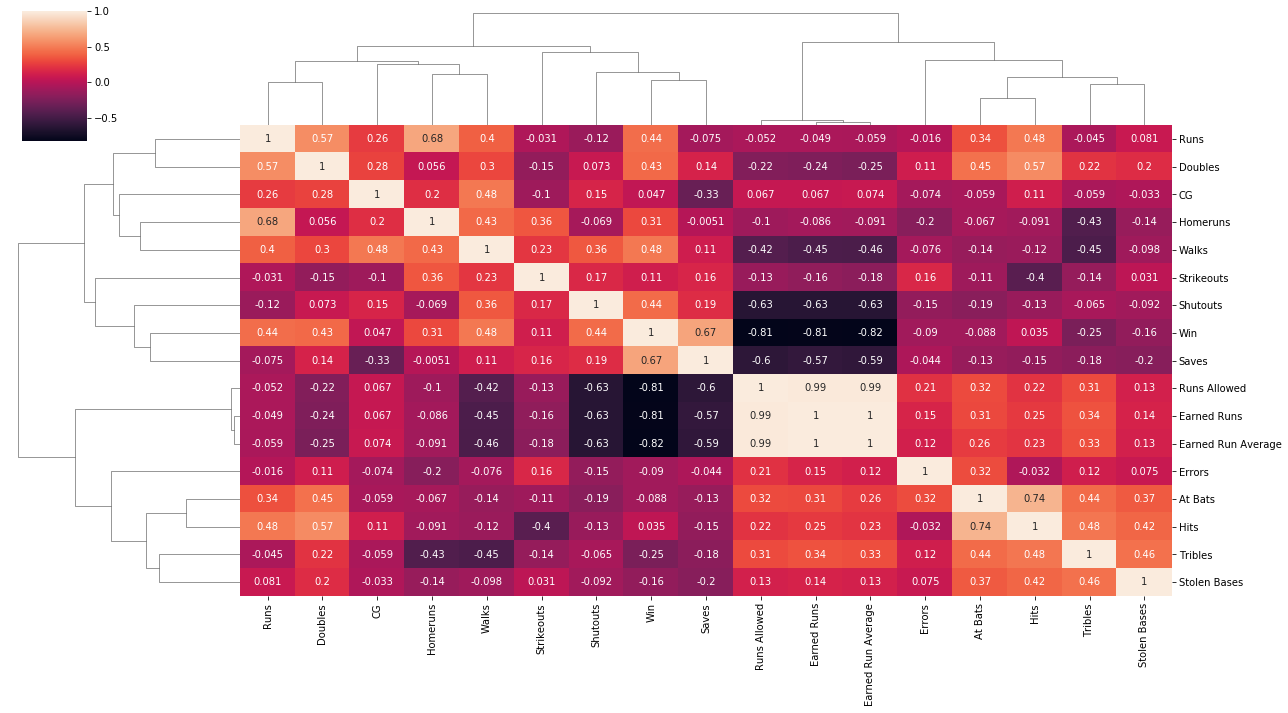

In [171]:
# clustermap of co-related data

sb.clustermap(data_final.corr(),annot=True,figsize=(18,10))

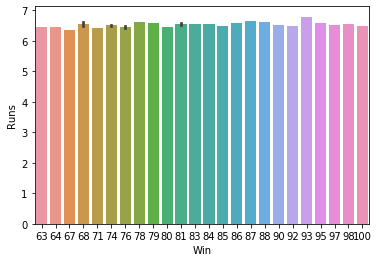

In [172]:
#graph representation of win and runs 

sb.barplot(x='Win',y='Runs',data=data_final)

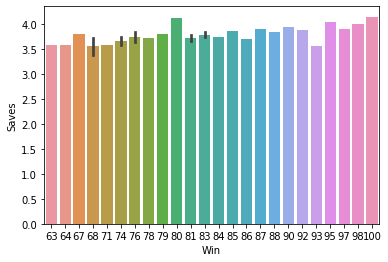

In [173]:
#graph representation of win and saves 


sb.barplot(x='Win',y='Saves',data=data_final)

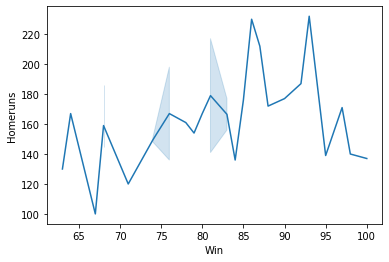

In [174]:
#graph representation of win and Homeruns 


sb.lineplot(x='Win',y='Homeruns',data=data_final)

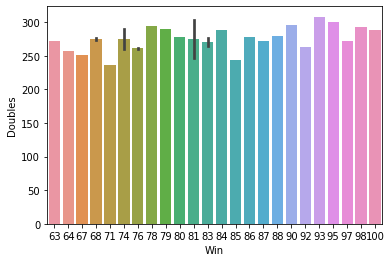

In [175]:
#graph representation of win and Doubles 

sb.barplot(x='Win',y='Doubles',data=data_final)

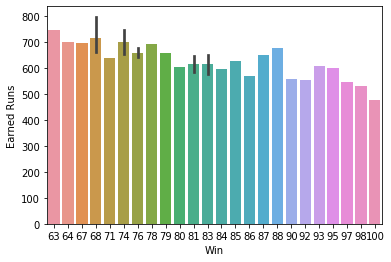

In [176]:
#graph representation of win and earned runs 


sb.barplot(x='Win',y='Earned Runs',data=data_final)

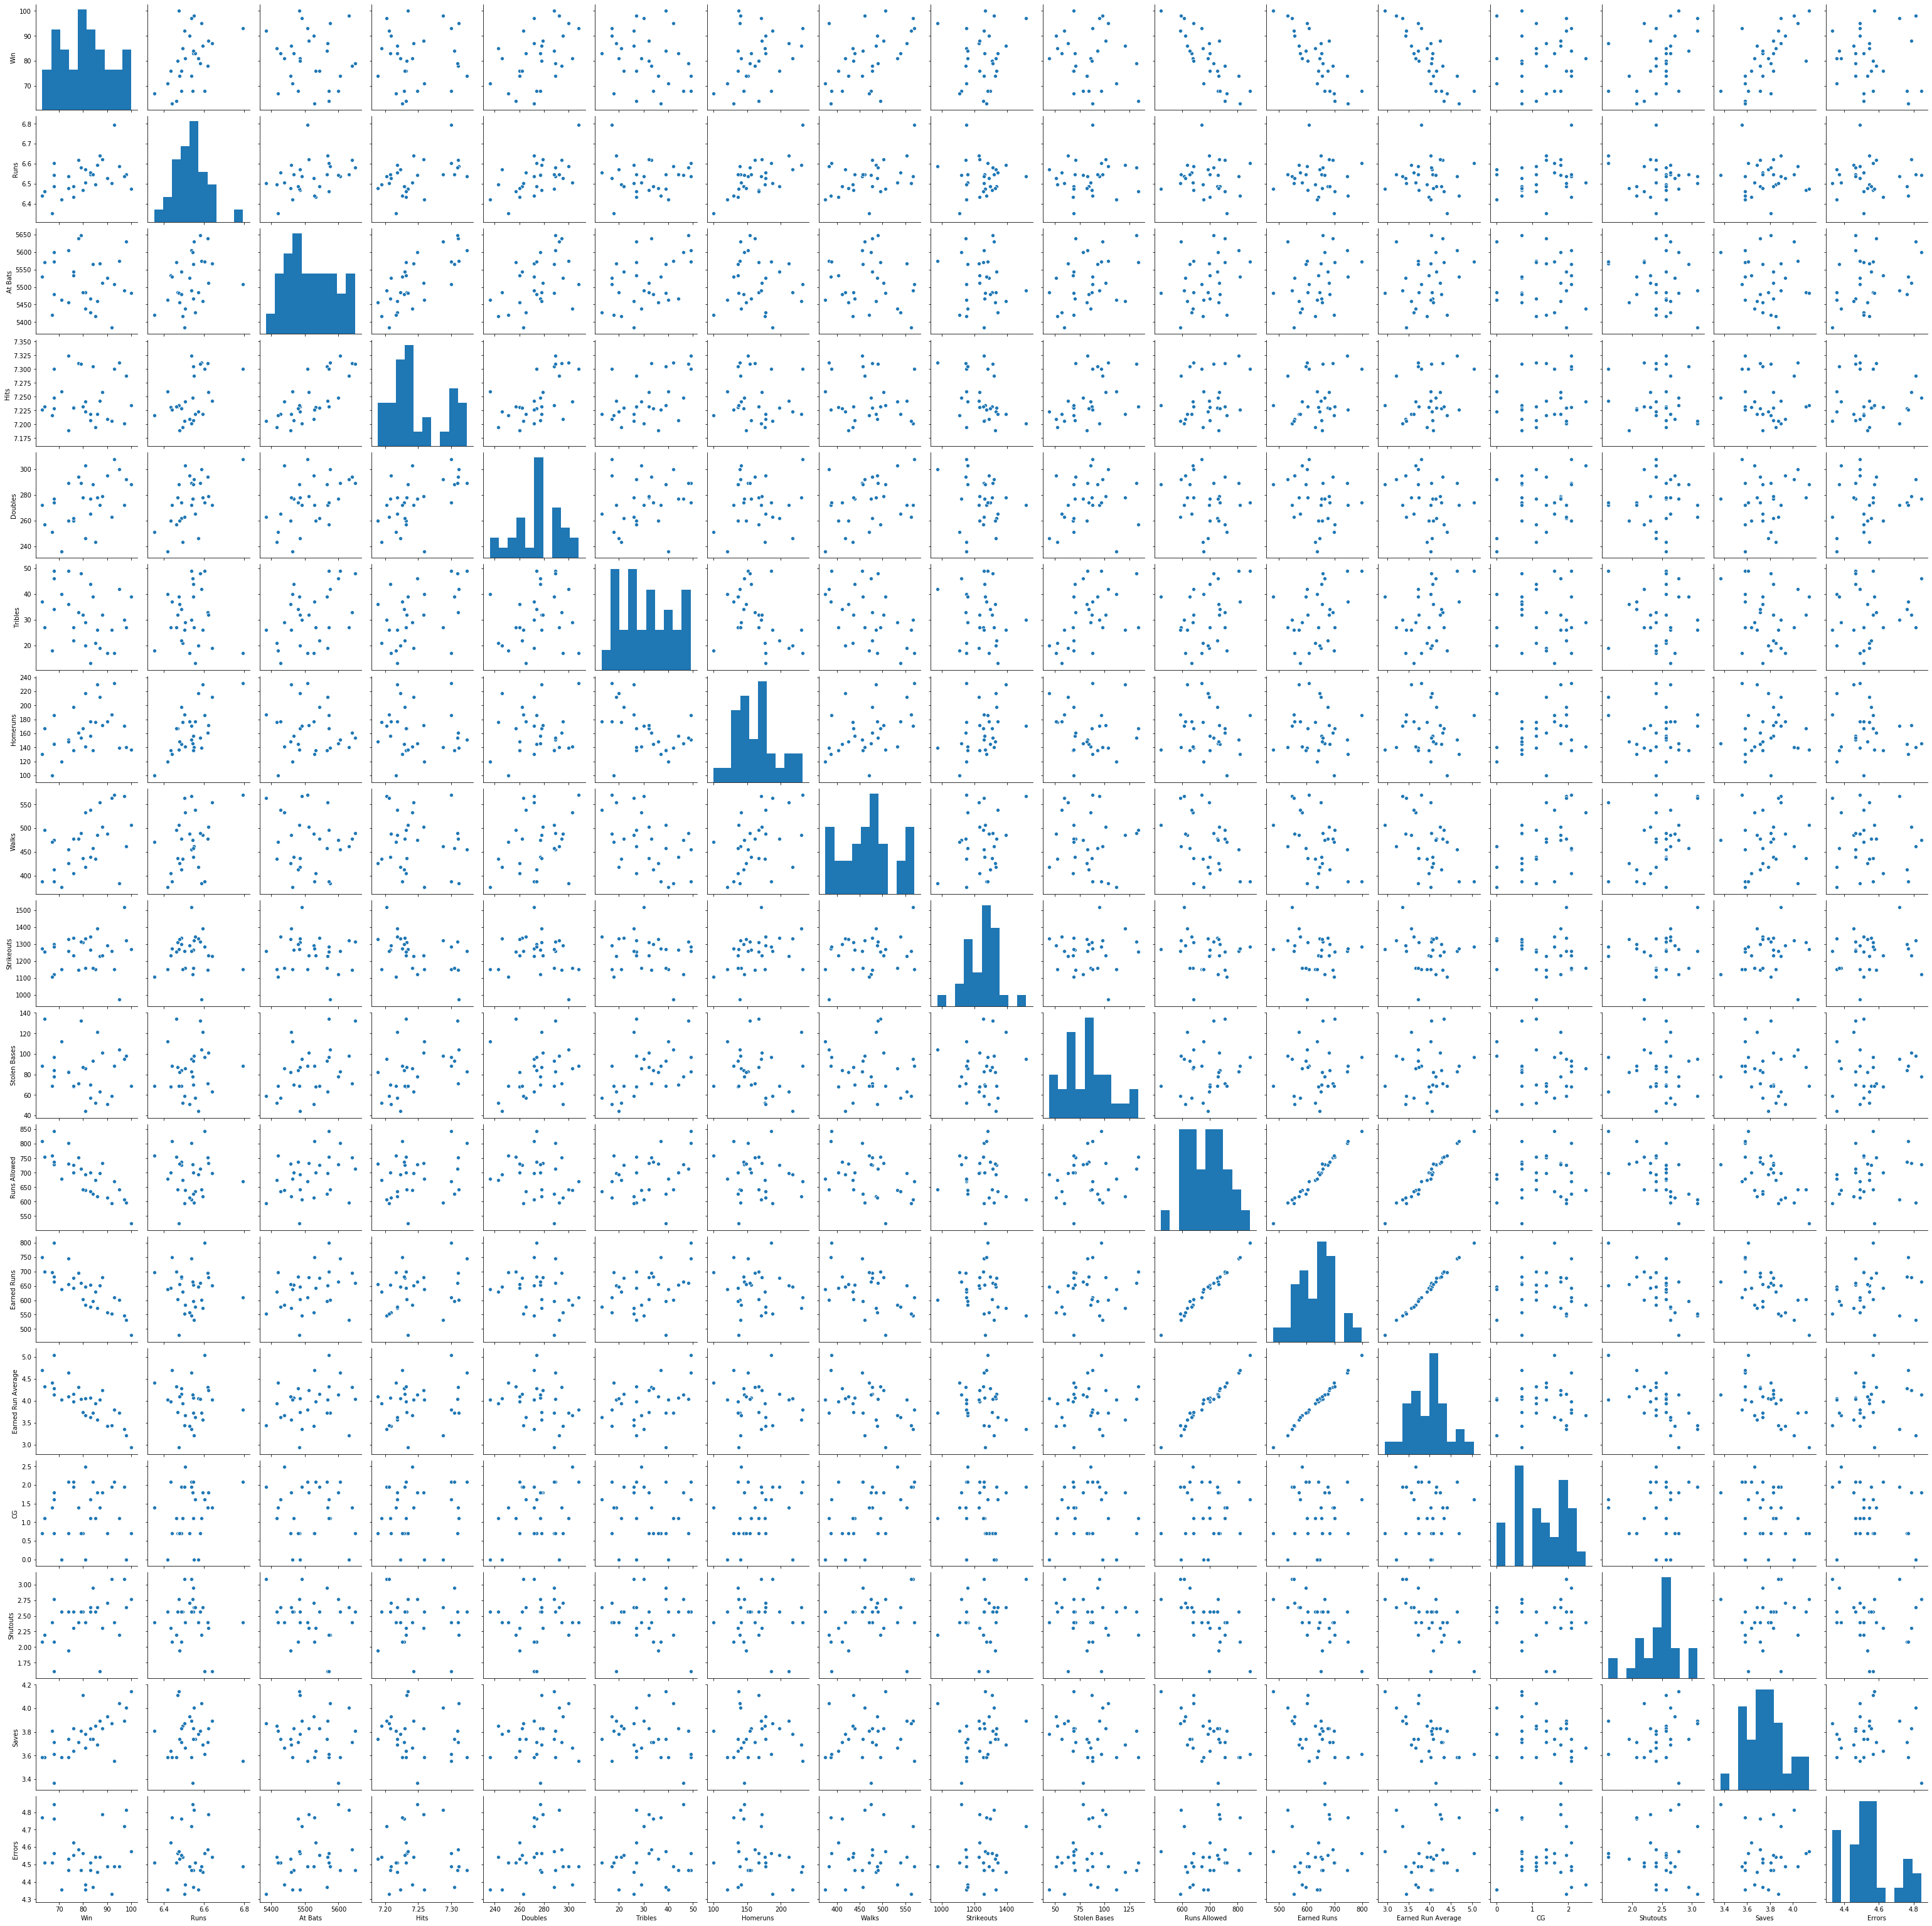

In [177]:
# paiwise plot of relationship with the dataset

sb.pairplot(data_final)

# Model Building

Considering the all the columns except wins for x


Considering win columns for y

In [178]:
x=data_final.drop(columns=['Win'])
y=data_final['Win']

In [179]:
print(x)
print(x.shape) #shape of x
print(y)
print(y.shape) # shape of y

        Runs  At Bats      Hits  Doubles  Tribles  Homeruns  Walks  \
0   6.586172     5575  7.311886      300       42       139    383   
1   6.546785     5467  7.207860      277       44       156    439   
2   6.507278     5439  7.241366      303       29       141    533   
3   6.434547     5533  7.231287      260       27       136    404   
4   6.536692     5605  7.323831      289       49       151    455   
5   6.793466     5509  7.300473      308       17       232    570   
6   6.639876     5567  7.242798      272       19       212    554   
7   6.570883     5485  7.223296      246       20       217    418   
8   6.469250     5485  7.232733      278       32       167    436   
9   6.618739     5640  7.310550      294       33       161    478   
10  6.622736     5511  7.258412      279       32       172    503   
11  6.593045     5459  7.218177      278       26       230    486   
12  6.495266     5417  7.194437      243       21       176    435   
13  6.487684     554

In [180]:
# creating a training model

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=20)

In [202]:
# working on linear Regressor 


le=LinearRegression()
model=le.fit(x_train,y_train)
pred=model.predict(x_test)

In [203]:
print(pred) #printing the predict value 

[76.58785973 63.62596841 74.68977342 76.94838816 53.34967171 82.05026247
 57.92086522 82.13743261 45.63237922]


In [204]:
le.coef_ #coefficient

array([ 6.62288316e+01,  4.18193258e-02,  9.67778216e+00, -2.66944713e-01,
        4.85950150e-03,  1.18995803e-02, -1.41559221e-02, -2.04895806e-02,
        2.64521371e-02,  3.57921684e-01, -4.30816448e-01, -1.17921963e+01,
        4.36090963e+00,  2.77817974e+00,  3.51896082e+01, -1.77769285e+01])

Text(0, 0.5, 'Predicted Y')

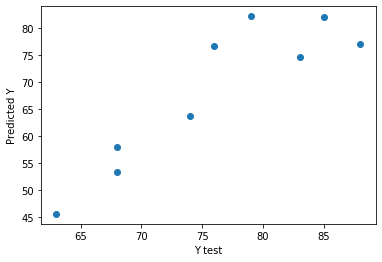

In [205]:
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [206]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 8.723109303813153
MSE : 103.95154043596952
RMSE : 10.195662824749038


In [207]:
#cross valiation 

score=cross_val_score(le,x,y,cv=5)
print('score mean:',score.mean())
print('score std :',score.std())
print()
#cross prediction
predscore=cross_val_predict(le,x,y,cv=5)
print(predscore)

score mean: -0.3343451180684237
score std : 1.7721685821573803

[93.3841972  83.66624572 77.61081519 74.04002177 65.79170667 91.09950589
 72.81286503 80.68459988 91.66085026 76.69762474 83.72483939 94.17540772
 87.14252545 78.97583259 83.71277121 95.9158809  88.28573437 89.43266798
 74.0083378  59.98708029 83.68398328 90.80679687 71.41134356 67.54870677
 56.75681351 90.76151508 76.68334282 87.28788753 90.79848243 65.86029645]


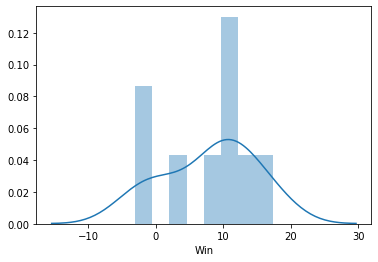

In [208]:
sb.distplot(y_test - pred,bins=8)

In [209]:
# working on ridge regression
rg=Ridge()
model=rg.fit(x_train,y_train)
pred=model.predict(x_test)


In [210]:
print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 7.999361227554851
MSE : 93.45412995709891
RMSE : 9.667167628478309


In [211]:
score=cross_val_score(rg,x,y,cv=5)
print('score mean:',score.mean())
print('score std :',score.std())
print()
predscore=cross_val_predict(rg,x,y,cv=5)
print(predscore)

score mean: -0.3651781835936279
score std : 1.7646420047151619

[82.7451507  78.84232807 85.1330271  74.99509555 69.03801745 87.74732575
 79.56189444 83.52883872 89.23656163 74.79326951 76.04143933 97.1119821
 84.02850252 76.87757218 87.62815993 98.06278929 84.82213347 82.79451554
 74.9232203  74.97941842 92.79599174 87.10984727 75.24269494 69.72430974
 62.73175057 91.96015798 87.75915606 80.21631186 72.1376434  64.7640132 ]


GridSearchCV on ridge 

assigning the alphavalue for gridSearchCV

In [213]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
grid=GridSearchCV(estimator=rg, param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print('best score :',grid.best_score_)
print('best params :',grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
best score : 0.44282041407164263
best params : {'alpha': 0.1}


From gridserachcv we got the best sore and best params

 used joblib and pickle to save here we are saving LinearRegressor model


In [193]:
joblib.dump(le,'baseball.pkl')

['baseball.pkl']

# Conlusion

EDA process is carried out with the help of pandas and other ploting libs
Ploting libs to develop the better insight of dataset 

Only linear regression modeling is used Since projects requires linear regression approach 

Cross validation ,Prediction and grid is aplied to linear regression model for better modeling

Finally t is saved using joblib and pickle